# Air Quality Prediction on Kaggle Dataset

# Import required Packages

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#  Data Preparation

In [3]:
d_train = pd.read_csv('Train.csv')
d_test  = pd.read_csv('Test.csv')

print(d_train.shape)
print(d_test.shape)

(1600, 6)
(400, 5)


In [4]:
d_train.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [5]:
d_test.head(5)

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [6]:
data_train = d_train.values
data_test = d_test.values

X_train = data_train[:,:5]
Y_train = data_train[:,5]

X_test = data_test[:,:]

ones = np.ones((X_train.shape[0],1))
X_train =  np.hstack((ones,X_train))

print(X_train.shape,Y_train.shape)
print(X_test.shape)

(1600, 6) (1600,)
(400, 5)


# Gradient Descendent Algorithm

  - Start with random theta
  - Repeat until convergence of error function
             - Update theta according to rule


In [7]:
def hypothesis(x,theta):
    sum = 0
    for i in range(x.shape[0]):
        
        sum += theta[i]*x[i]
    
    return sum
    

In [8]:
def error(X,Y,theta):
    
    m = X.shape[0]
    e = 0
    for i in range(m):
        
        yh = hypothesis(X[i],theta)
        e += (yh-Y[i])**2
    return e

In [9]:
def gradient(X,Y,theta):
    
    grad = np.zeros((X[0].shape[0],))
    
    for i in range (X.shape[0]):
        
        hyp = hypothesis(X[i],theta)
        
        for j in range(X[i].shape[0]):
            
            grad[j] += (hyp - Y[i])*X[i][j]
        
    return grad

In [10]:
def prediction(X_test,theta):
    
    y_pred = []
    
    for i in range (X_test.shape[0]):
        
        yh = hypothesis(X_test[i],theta)
        y_pred.append(yh)
        
    y_pred = np.array(y_pred)
    
    return y_pred
    

In [11]:
#Algorithm

def gradientDescent(X,Y,learning_rate = 0.001,max_itr=100):
    
    theta = np.zeros((X[0].shape[0],))
    
    itr = 0
    error_list = []
        
    while(itr < 2):
        
        e = error(X,Y,theta)
        error_list.append(e)
        
        grad = gradient(X,Y,theta)
        
        for i in range(X[0].shape[0]):
        
            theta[i] = theta[i] - learning_rate*grad[i]
        
        itr += 1
        
    while((error_list[-1] - error_list[-2]) < 0.002 and itr <= max_itr):
        e = error(X,Y,theta)
        error_list.append(e)
            
        grad = gradient(X,Y,theta)
        
        for i in range(X[0].shape[0]):
        
            theta[i] = theta[i] - learning_rate*grad[i]
        
        itr +=1
    return error_list,theta

[ 4.99096674 29.68187118 92.6624776   8.28062089 44.76773522  2.51916121]


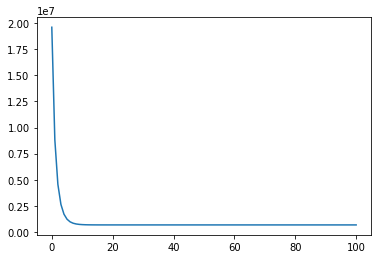

In [12]:
err,theta_final = gradientDescent(X_train,Y_train,max_itr=100)
print(theta_final)
plt.plot(err)
plt.show()

# Predictions on Testing data

In [13]:
pred = prediction(X_test,theta_final)
print(pred[:2])

[-21.91379208  74.41240016]


In [14]:
#Accuracy
num = 0 
den = 0
m = X_train.shape[0]
y_avg = 0

for i in range(m):
    
    y_avg +=Y_train[i]
    
    num += (Y_train[i] - hypothesis(X_train[i],theta_final))**2
    
y_avg = y_avg/m

for i in range(m):
    
    den += (Y_train[i] - y_avg)**2

score = 1 - (num/den)

print("Score : %.4f"%score)

Score : 0.9661
